<center><img src="http://sydney.edu.au/images/content/about/logo-mono.jpg"></center>

<center><h1>Statistical Learning and Data Mining (QBUS3820)</h1></center>
<center><h2>Tutorial 13: Unsupervised Learning Methods</h2></center>
<br>


In this tutorial, we run selected unsupervised learning algorithms. The goal of unsupervised learning is to discover patterns in data.

<a href="#Clustering">Clustering</a> <br>
<a href="#K-means">K-means Clustering</a> <br>
<a href="#PCA">Principal Component Analysis</a> <br>
<a href="#MDS">Multidimensional Scaling</a> <br>




# Clustering

In [31]:
from __future__ import division
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import scale
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import pylab as pl
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import Binarizer
%matplotlib inline

In [2]:
car_data=pd.read_csv('mtcars.csv',index_col=0)
car_data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
list(car_data.columns.values)

['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

In [4]:
# we select and standardise the first 7 variables (quantitative)
car_data_pre = car_data.iloc[:,0:7]
car_data = pd.DataFrame(scale(car_data_pre),index = car_data.index, columns = car_data.columns[0:7])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


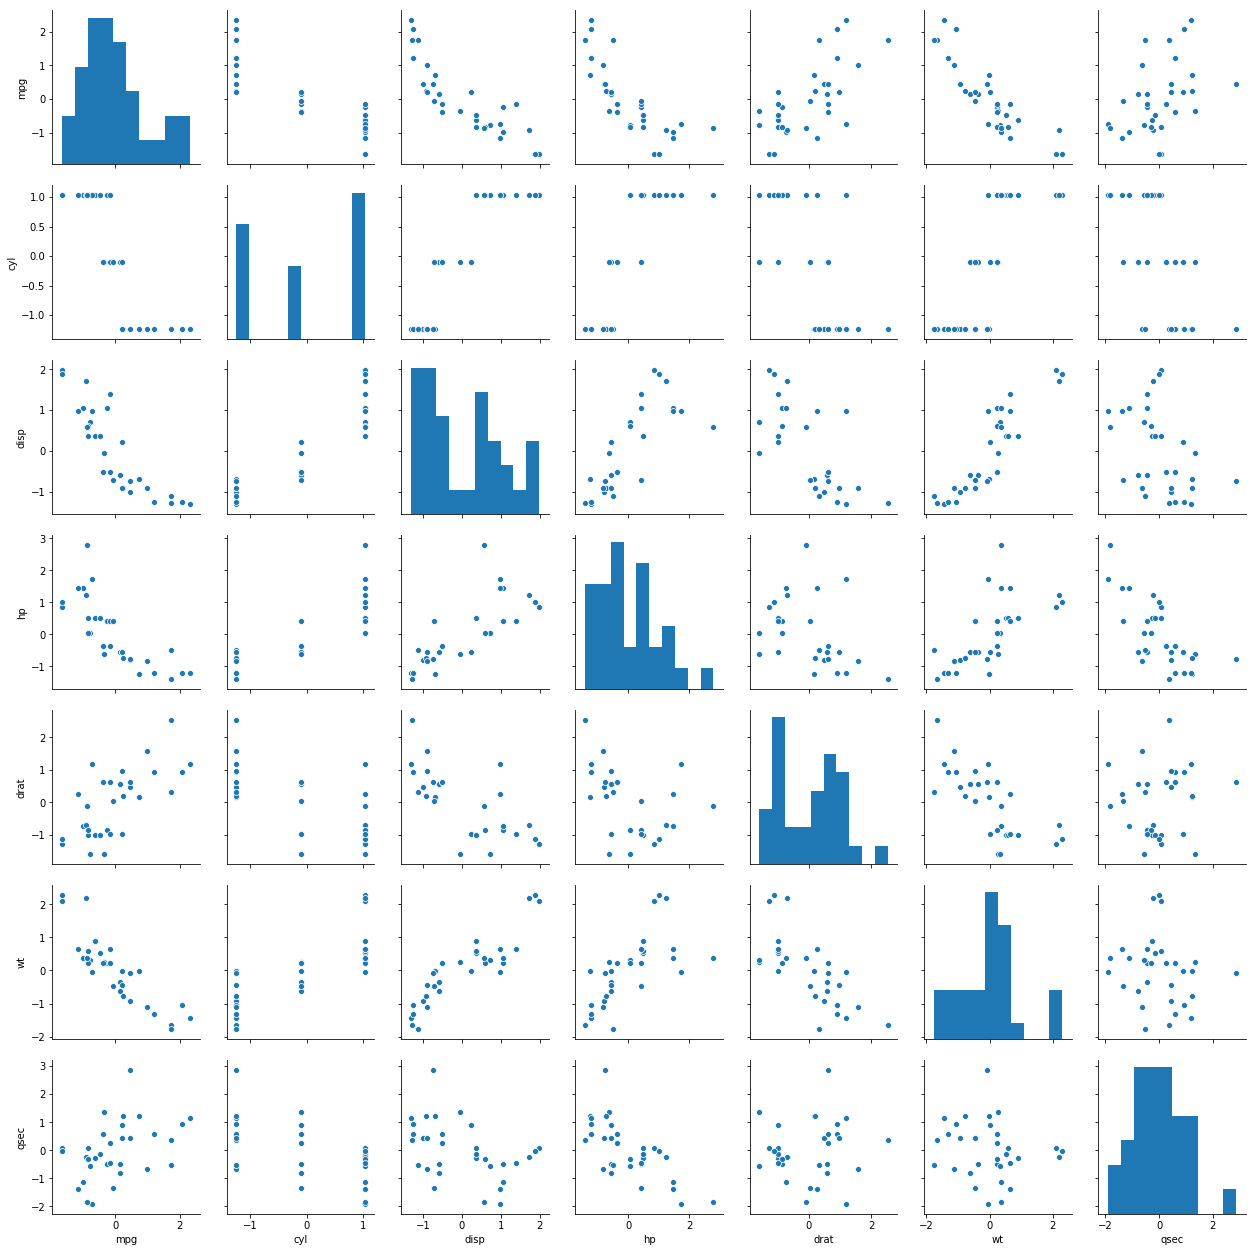

In [5]:
sns.pairplot(car_data)
plt.show()

### Hierarchical cluster analysis

In [6]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

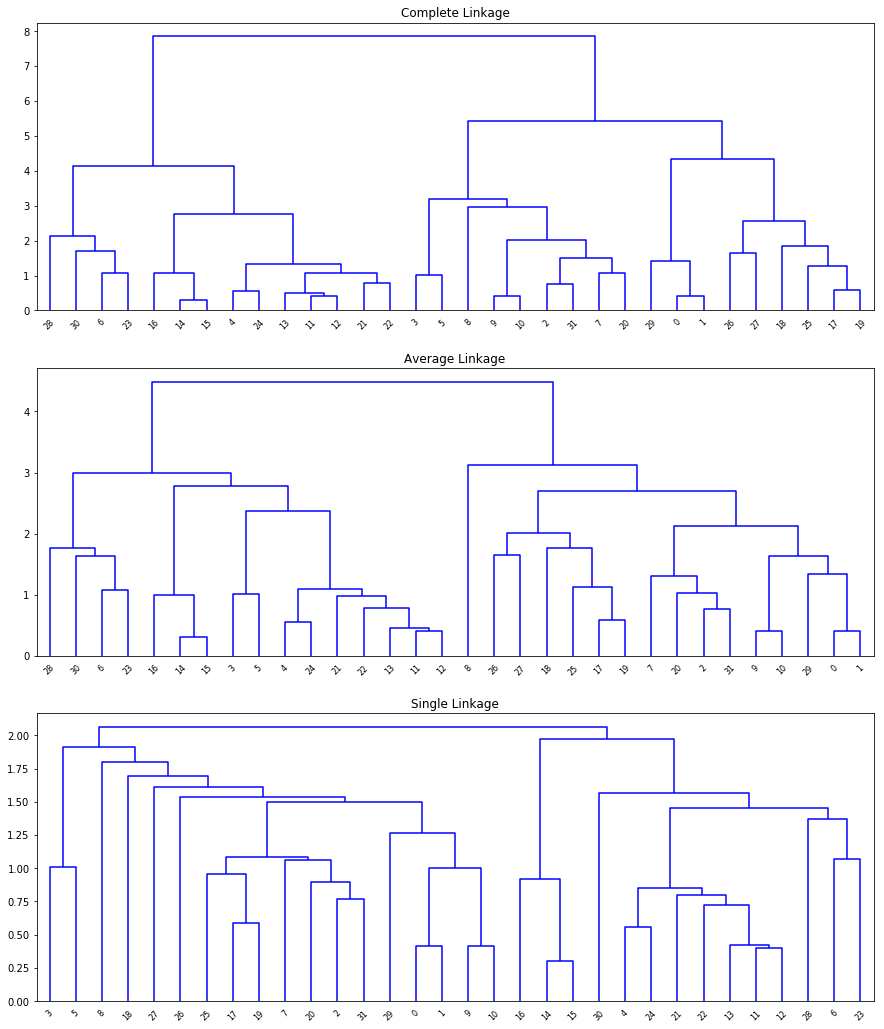

In [7]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

for linkage, cluster, ax in zip([hierarchy.complete(car_data), hierarchy.average(car_data), hierarchy.single(car_data)], ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage')
plt.show()

# K-means

Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps the simplest to understand is an algorithm known as k-means clustering, which is implemented in sklearn.cluster.KMeans

In [8]:
from sklearn.cluster import KMeans

#### K=2

In [9]:
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(car_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
km1.labels_

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [11]:
pd.Series(km1.labels_).value_counts()

0    18
1    14
dtype: int64

In [12]:
pd.DataFrame(km1.cluster_centers_, columns= car_data.columns)

,mpg,cyl,disp,hp,drat,wt,qsec
0,0.654346,-0.801983,-0.780273,-0.720654,0.542813,-0.631531,0.476098
1,-0.841301,1.031121,1.003208,0.926555,-0.697902,0.811968,-0.612126


We can now display the clusters along each pair of variables. We plot the cluster centres with a star.

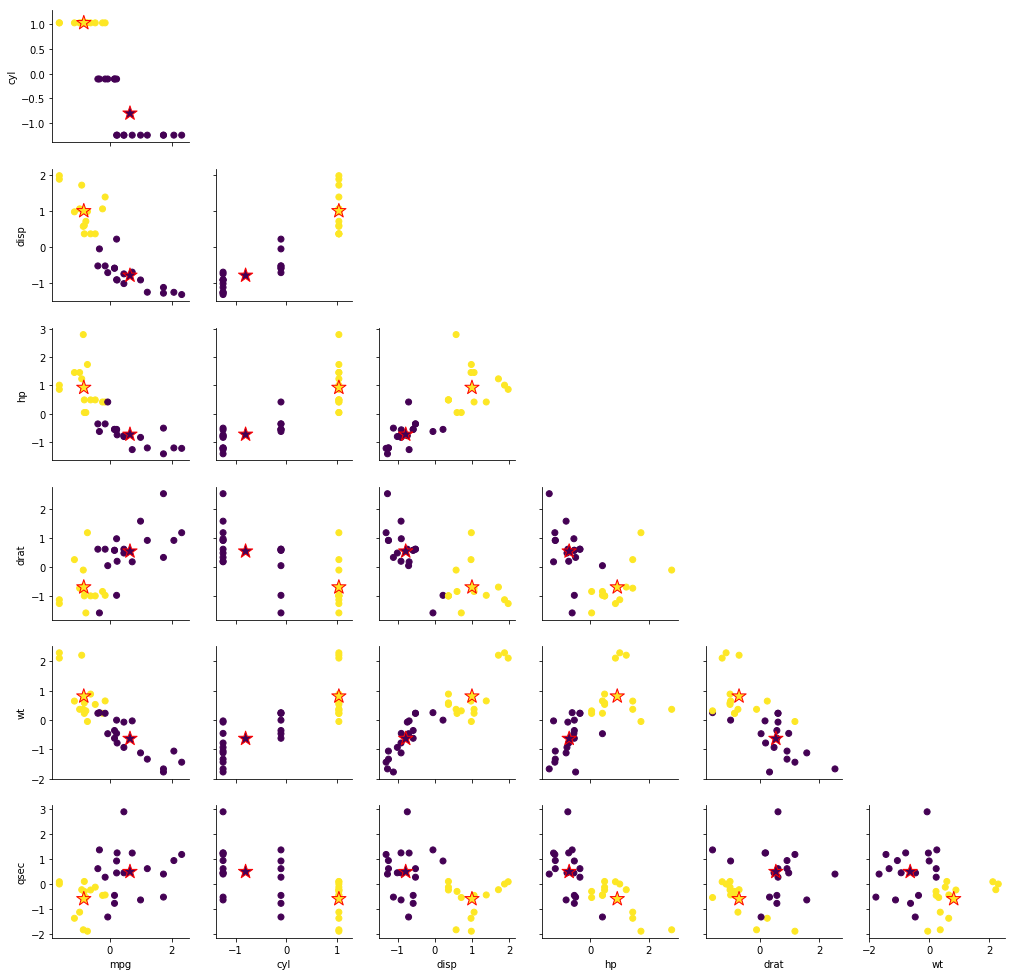

In [13]:
#iterate through each column

fig = plt.figure(figsize = (20,20))
for i in range(car_data.shape[1]-1):
    #iterate through the next pairs
    for j in range(i+1, car_data.shape[1]):
        #add a subplot to show the scatter plot for this pair of variables
        ax = fig.add_subplot(car_data.shape[1], car_data.shape[1], car_data.shape[1]*j+i+1)
        #do the scatter plot, colouring by their k-means cluster
        ax.scatter(car_data.iloc[:,i], car_data.iloc[:,j], c = km1.labels_)
        #show the cluster centers
        ax.scatter(km1.cluster_centers_[:, i], km1.cluster_centers_[:, j], s = 15**2.0, marker = '*', c = list(set(km1.labels_)), edgecolor='r')
        #some additional plot formatting:
        #only label the y axis on the leftmost subplots
        if i == 0:
            ax.set_ylabel(car_data.columns[j])
        else:
            #remove yticklabels on the middle subplots
            ax.set_yticklabels([])
        #only label the x axis on the bottom subplots
        if j == car_data.shape[1]-1:
            ax.set_xlabel(car_data.columns[i])
        else:
            #remove xticklabels in the middle subplots
            ax.set_xticklabels([])
        #pyplot equivalent of sns.despine(): remove top and right axis borders for a neater look
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
plt.show()

#### K=3

In [14]:
km2 = KMeans(n_clusters=3, n_init=20)

km2.fit(car_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
km2.labels_

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0,
       0, 0, 0, 2, 2, 2, 0, 1, 0, 1])

In [16]:
pd.Series(km2.labels_).value_counts()

0    14
1    12
2     6
dtype: int64

In [17]:
pd.DataFrame(km2.cluster_centers_, columns = car_data.columns)

,mpg,cyl,disp,hp,drat,wt,qsec
0,-0.841301,1.031121,1.003208,0.926555,-0.697902,0.811968,-0.612126
1,0.140656,-0.580746,-0.579887,-0.553534,0.191802,-0.249382,0.557909
2,1.681725,-1.244457,-1.181045,-1.054894,1.244834,-1.395829,0.312476


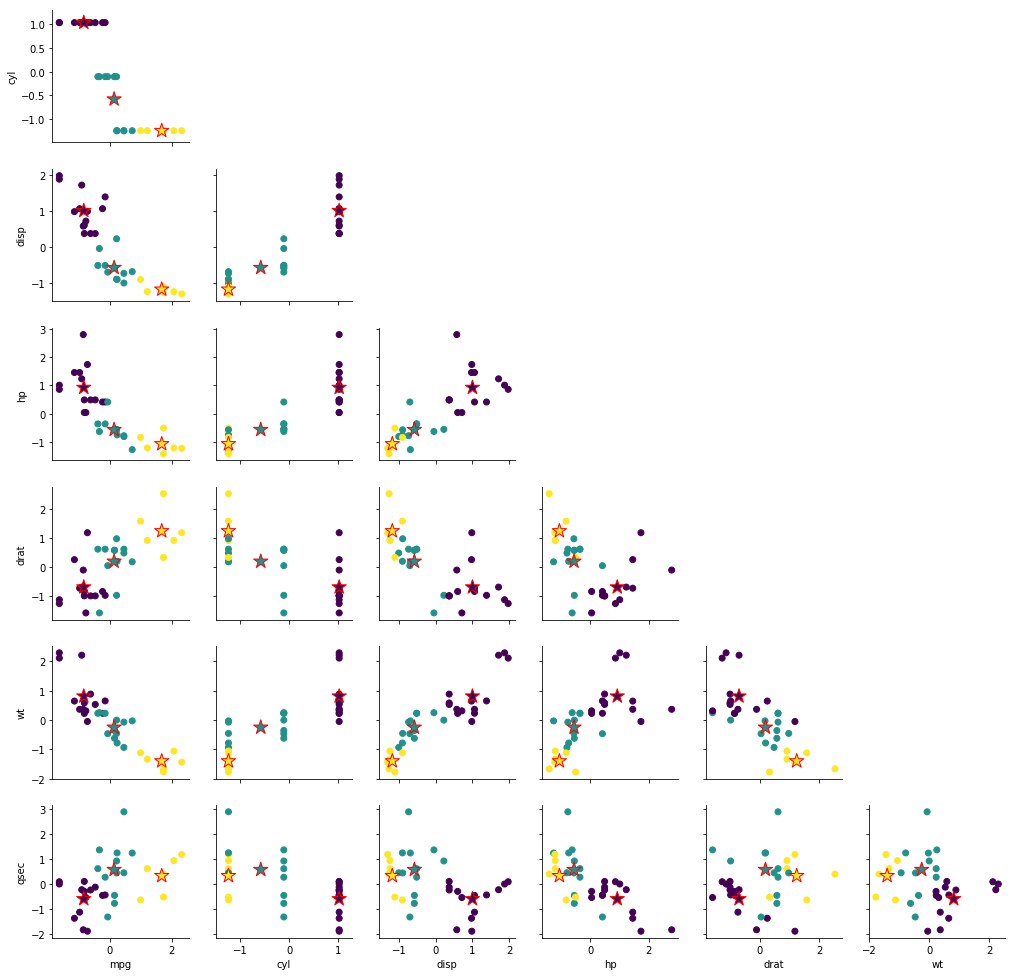

In [18]:
fig = plt.figure(figsize = (20,20))
for i in range(car_data.shape[1]-1):
    #iterate through the next pairs
    for j in range(i+1, car_data.shape[1]):
        #add a subplot to show the scatter plot for this pair of variables
        ax = fig.add_subplot(car_data.shape[1], car_data.shape[1], car_data.shape[1]*j+i+1)
        #do the scatter plot, colouring by their k-means cluster
        ax.scatter(car_data.iloc[:,i], car_data.iloc[:,j], c = km2.labels_)
        ax.scatter(km2.cluster_centers_[:, i], km2.cluster_centers_[:, j], s = 15**2.0, marker = '*', c = list(set(km2.labels_)), edgecolor='r')

        #some additional plot formatting:
        #only label the y axis on the leftmost subplots
        if i == 0:
            ax.set_ylabel(car_data.columns[j])
        else:
            #remove yticklabels on the middle subplots
            ax.set_yticklabels([])
        #only label the x axis on the bottom subplots
        if j == car_data.shape[1]-1:
            ax.set_xlabel(car_data.columns[i])
        else:
            #remove xticklabels in the middle subplots
            ax.set_xticklabels([])
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
plt.show()

# PCA

In [3]:
salesinfo = pd.read_csv("SalesEval.txt", delim_whitespace=True, index_col='PERSON')
#read_table deprecated
#salesinfo = pd.read_table("SalesEval.txt", delim_whitespace=True, index_col='PERSON')
salesinfo.head()

,X1,X2,X3,X4,X5,X6,X7
PERSON,,,,,,,
1,93.0,96.0,97.8,9,12,9,20
2,88.8,91.8,96.8,7,10,10,15
3,95.0,100.3,99.0,8,12,9,26
4,101.3,103.8,106.8,13,14,12,29
5,102.0,107.8,103.0,10,15,12,32


In [4]:
salesinfo.describe().round(1)

,X1,X2,X3,X4,X5,X6,X7
count,50.0,50.0,50.0,50.0,50.0,50.0,50.0
mean,98.8,106.6,102.8,11.2,14.2,10.6,29.8
std,7.3,10.1,4.7,4.0,3.4,2.1,10.5
min,81.5,87.3,94.3,1.0,5.0,5.0,9.0
25%,93.6,99.5,99.1,8.2,12.0,9.0,21.5
50%,100.6,106.2,103.2,10.0,15.0,11.0,31.5
75%,105.0,114.8,106.4,14.0,17.0,12.0,37.0
max,110.8,122.3,115.3,18.0,20.0,15.0,51.0


In [5]:
salesinfo_scaled = pd.DataFrame(scale(salesinfo),index = salesinfo.index, columns = salesinfo.columns)

/Users/leannedong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [7]:
salesinfo_scaled.describe().round(1)

,X1,X2,X3,X4,X5,X6,X7
count,50.0,50.0,50.0,50.0,50.0,50.0,50.0
mean,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.4,-1.9,-1.8,-2.6,-2.7,-2.6,-2.0
25%,-0.7,-0.7,-0.8,-0.8,-0.7,-0.7,-0.8
50%,0.2,-0.0,0.1,-0.3,0.2,0.2,0.2
75%,0.9,0.8,0.8,0.7,0.8,0.7,0.7
max,1.6,1.6,2.7,1.7,1.7,2.1,2.0


The variances are now comparable.

In [8]:
# The loading vectors
pca_loadings = pd.DataFrame(PCA().fit(salesinfo_scaled).components_.T, index=salesinfo_scaled.columns, columns=['V1','V2','V3','V4','V5','V6','V7'])
pca_loadings.head().round(5)

,V1,V2,V3,V4,V5,V6,V7
X1,0.43367,-0.11175,-0.07549,0.04237,0.63249,-0.33660,-0.52783
X2,0.42021,0.02929,-0.44248,-0.01075,-0.00012,0.78534,-0.09948
X3,0.42105,0.00920,0.20419,0.32493,-0.70103,-0.15681,-0.39916
X4,0.29429,0.66842,0.45149,0.30271,0.26101,0.11417,0.29996
X5,0.34909,0.29494,0.00592,-0.84660,-0.17426,-0.19691,0.07231


In [34]:
# Fit the PCA model and transform Z_df to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(salesinfo_scaled), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'],index = salesinfo_scaled.index)
df_plot.head().round(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
PERSON,,,,,,,
1,-2.23432,0.13809,0.01153,-0.10966,0.19238,-0.15696,-0.02262
2,-3.16906,-0.53669,0.45547,-0.03928,0.01232,0.09074,0.01617
3,-1.66724,-0.16392,-0.51167,0.04507,0.09088,-0.19569,-0.02409
4,0.67105,-0.17200,0.92093,0.35620,-0.19412,-0.21923,-0.25085
5,0.53313,-0.66096,0.10130,-0.32284,0.17134,-0.06358,-0.04183


In [47]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (20.0, 12.0)
plt.rcParams['font.family'] = "serif"

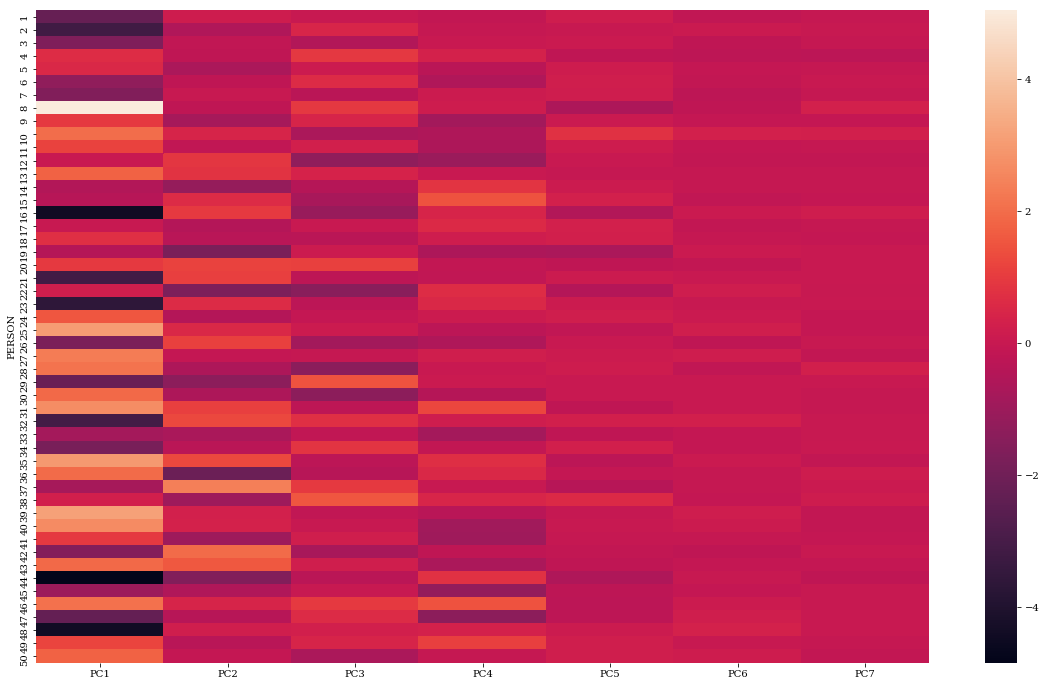

In [48]:
sns.heatmap(df_plot)
plt.show()

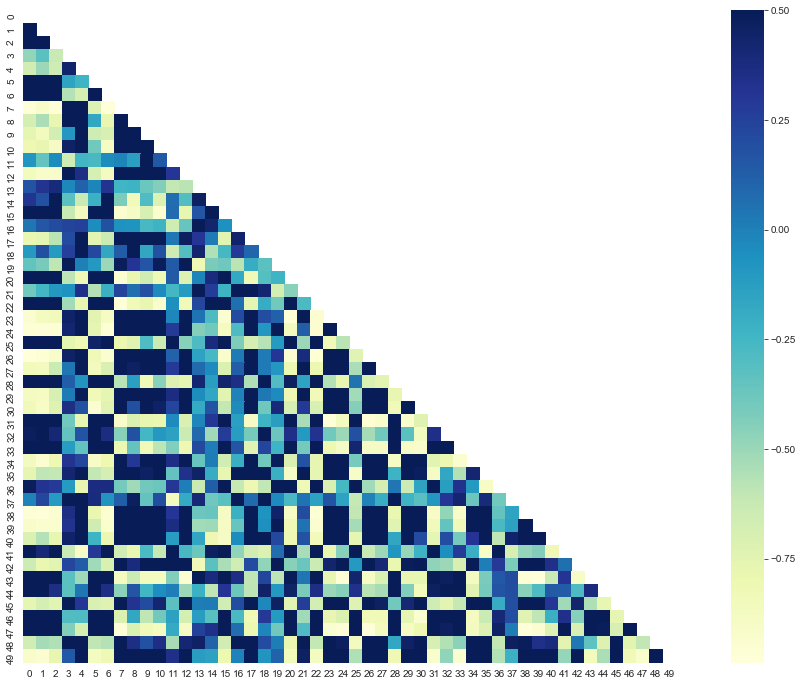

In [49]:
corr = np.corrcoef(df_plot)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.5, square=True,  cmap="YlGnBu")
    plt.show()

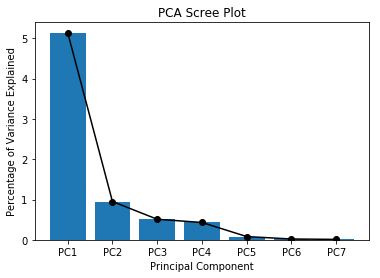

In [25]:
percent_variance = np.round(pca.explained_variance_, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7']
plt.bar(x= range(1,8), height=percent_variance, tick_label=columns)
plt.plot(range(1,8), percent_variance, 'o-', c = 'k')
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [26]:
R = salesinfo.corr()
R.round(2)

,X1,X2,X3,X4,X5,X6,X7
X1,1.00,0.93,0.88,0.57,0.71,0.67,0.93
X2,0.93,1.00,0.84,0.54,0.75,0.47,0.94
X3,0.88,0.84,1.00,0.70,0.64,0.64,0.85
X4,0.57,0.54,0.70,1.00,0.59,0.15,0.41
X5,0.71,0.75,0.64,0.59,1.00,0.39,0.57
X6,0.67,0.47,0.64,0.15,0.39,1.00,0.57
X7,0.93,0.94,0.85,0.41,0.57,0.57,1.00


In [27]:
eigvals, eigvecs = np.linalg.eig(R)
print('Eigenvalues:')
print(eigvals)
print('\nEigenvectors:')
pd.DataFrame(eigvecs, columns=pd.Series(eigvals).round(3)).round(3)

Eigenvalues:
[5.03459779 0.93351614 0.49791975 0.42124549 0.08104043 0.01133977
 0.02034063]

Eigenvectors:


,5.035,0.934,0.498,0.421,0.081,0.011,0.02
0,0.434,0.112,0.075,0.042,-0.632,0.528,0.337
1,0.420,-0.029,0.442,-0.011,0.000,0.099,-0.785
2,0.421,-0.009,-0.204,0.325,0.701,0.399,0.157
3,0.294,-0.668,-0.451,0.303,-0.261,-0.300,-0.114
4,0.349,-0.295,-0.006,-0.847,0.174,-0.072,0.197
5,0.289,0.642,-0.604,-0.154,-0.087,-0.228,-0.236
6,0.407,0.200,0.434,0.246,0.050,-0.636,0.371


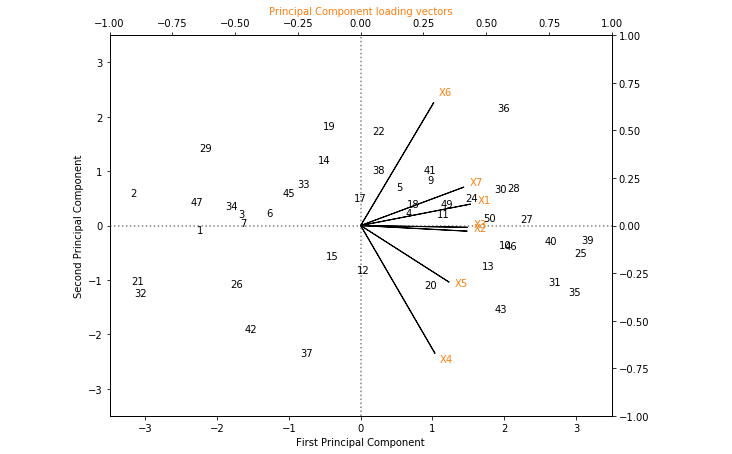

In [32]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='C1')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='C1')

# Plot vectors
for x, y in zip(pca_loadings.V1, pca_loadings.V2):
    ax2.arrow(0,0,x,-y)


# MDS

The fundamental idea of MDS is to represent high-dimensional point in fewer (usually 2) dimensions keeping distances between the points similar. For more information, see http://geostatisticslessons.com/lessons/mds

Key problem: Given only distances between points, how to recover the positions of the points?

In [33]:
from sklearn import manifold
from sklearn.manifold import MDS
from sklearn import metrics

Example: The eurodist datset provides the road distances (in kilometers) between 21 cities in Europe. Given this matrix of pairwise distances $D=[d_{ij}]$, MDS can be used to recover the coordinates of the cities in some Euclidean reference system whose orientation is arbitrary.

In [34]:
euro_dist = pd.read_csv('eurodist.csv')
euro_dist.iloc[:5,:5]

,city,Athens,Barcelona,Brussels,Calais
0,Athens,0,3313,2963,3175
1,Barcelona,3313,0,1318,1326
2,Brussels,2963,1318,0,204
3,Calais,3175,1326,204,0
4,Cherbourg,3339,1294,583,460


In [35]:
city = euro_dist["city"]
D = np.array(euro_dist.iloc[:, 1:])  # Distance matrix

In [36]:
mds = MDS(dissimilarity='precomputed', n_components=2, random_state=40, max_iter=3000,eps=1e-9)
mds_fit = mds.fit_transform(D)

In [37]:
Deuclidean = metrics.pairwise.pairwise_distances(mds_fit, metric='euclidean') 
pd.DataFrame(Deuclidean[:5, :5], columns = city[:5], index=city[:5]).round(1)

city,Athens,Barcelona,Brussels,Calais,Cherbourg
city,,,,,
Athens,0.0,3115.7,2993.8,3180.7,3427.7
Barcelona,3115.7,0.0,1316.6,1288.5,1127.6
Brussels,2993.8,1316.6,0.0,197.7,538.3
Calais,3180.7,1288.5,197.7,0.0,358.2
Cherbourg,3427.7,1127.6,538.3,358.2,0.0


(-1974.6478878176313,
 2854.5908395535594,
 -1577.5482590385088,
 2131.090455149926)

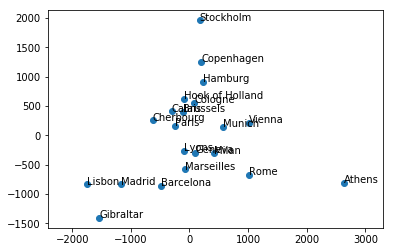

In [38]:
# Plot: apply a rotation, and reflect about vertical axis
theta = 75 * np.pi / 180.
rot = np.array([[np.cos(theta), -np.sin(theta)],
                [np.sin(theta),  np.cos(theta)]])
Xr = np.dot(mds_fit, rot)

# flip x
Xr[:, 0] *= -1
plt.scatter(Xr[:, 0], Xr[:, 1])
for i in range(len(city)):
    plt.text(Xr[i, 0], Xr[i, 1], city[i])
plt.axis('equal')